# Assignment4 (B) -- Plots

In [86]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
# !pip install dash
# !pip install dash_mantine_components
# !pip install matplotlib
# !pip install folium

In [3]:
import pandas as pd
import numpy as np
from dash import Dash, dash_table, dcc, callback, Output, Input
import plotly.express as px
import dash_mantine_components as dmc
import dash_bootstrap_components as dbc
import matplotlib.pyplot as plt

original_run_df = pd.read_csv("run.csv")
run_df = original_run_df[['timestamp','cadence','distance','enhanced_altitude','heart_rate','speed_kmhr','position_lat','position_long']]
run_df
bike_df = pd.read_csv("bike.csv")
# display(run_df,bike_df)

## Part I. Correlation
I hypothesize there is a correlation between cadence, distance,altitude,heart rate and speed, which would have a direct releationship since the more cadence, either steps in running or rpm in cycling).

In [4]:
run_df = original_run_df[['cadence','distance','enhanced_altitude','heart_rate','speed_kmhr']]
run_pt1_df = run_df.rename(columns={'enhanced_altitude':'altitude','speed_kmhr':'speed'})
# run_pt1_df

In [5]:
bike_pt1_df = bike_df[['cadence','distance','enhanced_altitude','heart_rate','speed_kmhr']]
bike_pt1_df = bike_pt1_df.rename(columns={'enhanced_altitude':'altitude','speed_kmhr':'speed'})
# bike_pt1_df

In [6]:
def create_splom(df,suptitle):
    cols = ['cadence','distance','heart_rate','altitude','speed']
    fig, axs = plt.subplots(len(cols), len(cols), figsize=(10,10))
    fig.suptitle("Correlation for {} Activities".format(suptitle))
    for i in range(len(cols)):
        for j in range(len(cols)):
            # Now we just want to plot a scatter plot comparing the columns i and j. Sometimes this will be the
            # same column, so we would expect to see a diagnol line trend. I'm going to set the marker size to 5
            # just to make things a bit more clear
            axs[i,j].scatter(df[cols[j]], df[cols[i]], s=2)
    
            # Also, we've seen that when we plot multiple Axes things get cluttered with Axis tickmarks and
            # labels, so let's turn those off
            axs[i,j].get_xaxis().set_visible(False)
            axs[i,j].get_yaxis().set_visible(False)
    
            # Then we'll turn them back on only if we are the last row...
            if i == len(cols) - 1:
                axs[i,j].get_xaxis().set_visible(True)
                axs[i,j].set_xlabel(cols[j])
                
            # ...and similarly, only show the y-axis labels for the first column.
            if j == 0:
                axs[i,j].get_yaxis().set_visible(True)
                axs[i,j].set_ylabel(cols[i])

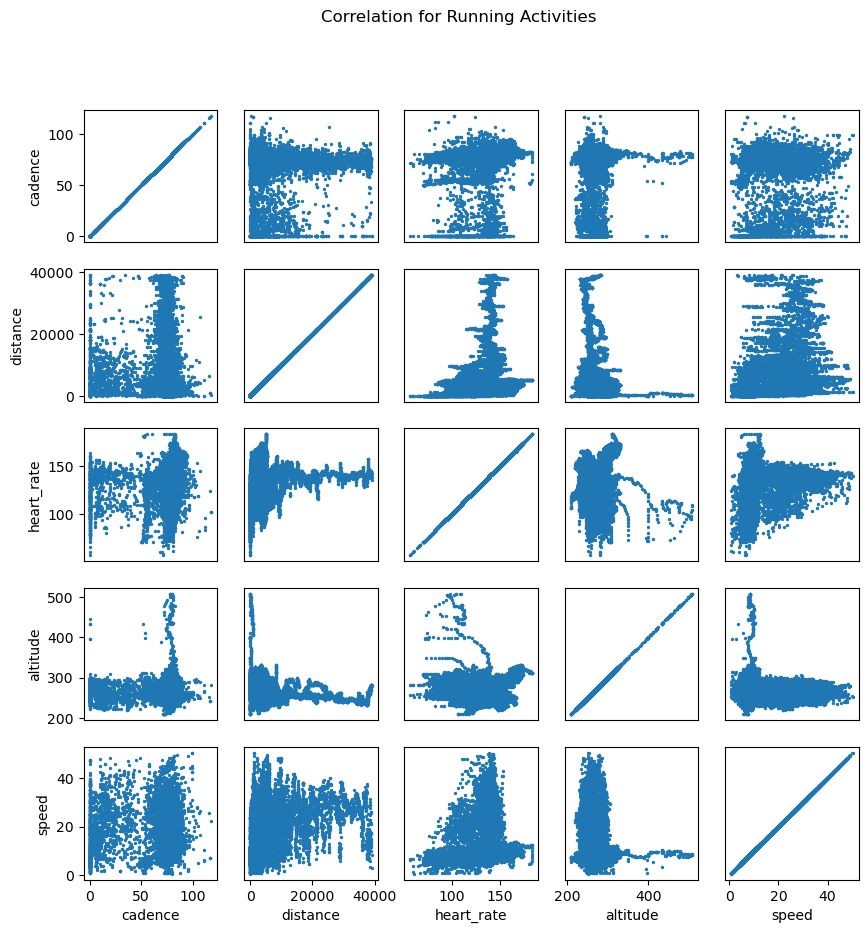

In [7]:
create_splom(run_pt1_df,"Running")

## Findings: ???

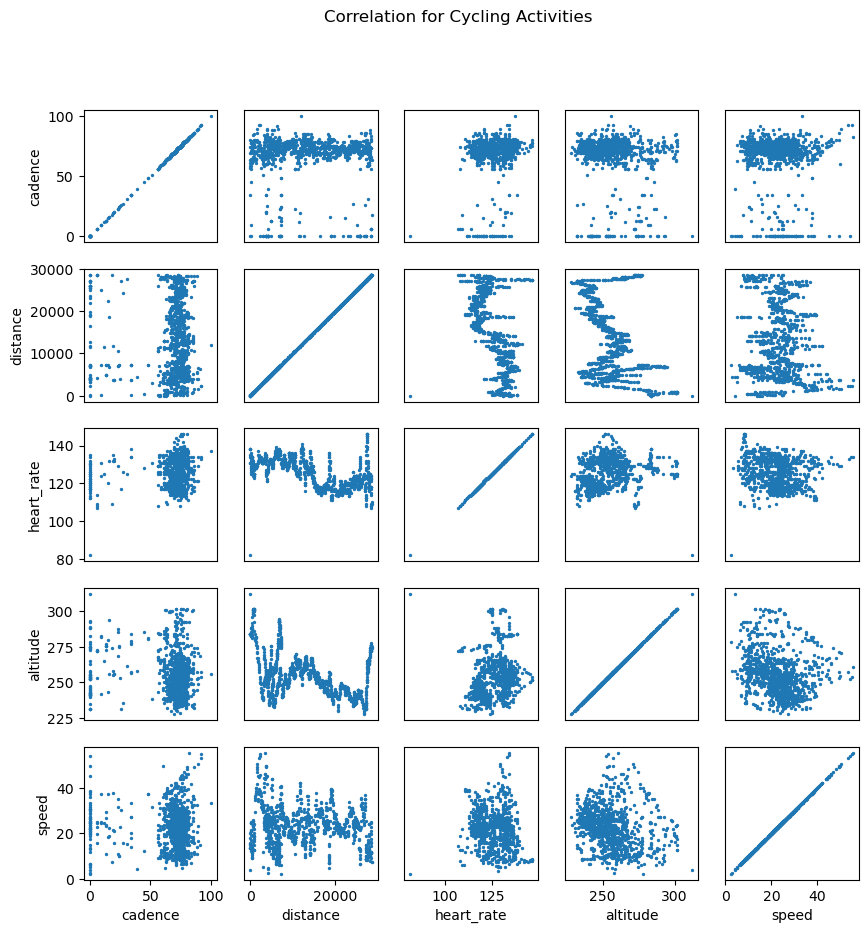

In [8]:
create_splom(bike_pt1_df,"Cycling")

## Findings

# Part II. Efficiency Running

We focus on efficiency in running by using the power data in running sessions.

In [9]:
# Plot Airpower / power /

Graph3 -> Assumption = time series of Heart Rates (heart rate + timestamp)
(Time series) --> use plotly with drop down as date -> filter to show efficiency (heartrate / cadence?)

In [12]:
part2_df = original_run_df[['timestamp','Air Power','Form Power','Power','cadence','Ground Time','Leg Spring Stiffness','Vertical Oscillation']].dropna()
part2_df = part2_df[part2_df['Form Power'].notnull()]
part2_df['date'] = pd.to_datetime(part2_df['timestamp']).dt.strftime('%Y-%m-%d')
# part2_df['date'] = pd.to_datetime(part2_df['timestamp']).dt.date
# part2_df

In [14]:
import holoviews as hv

# @pn.depends(select_var)
# def create_line(date_var):

# Filter data based on Corruption Index rate
filtered_df = part2_df[part2_df['date'] == '2019-08-17'].copy()
# display(filtered_df)
matrics_list = ['Air Power','Form Power','Power','cadence','Ground Time','Leg Spring Stiffness','Vertical Oscillation']

# combined = hv.Vline(7)

# for matric in matrics_list:
    # Create line plot
lines = filtered_df.hvplot.line(
    x='timestamp',
    y=['Air Power','Form Power','Power','cadence','Ground Time','Leg Spring Stiffness','Vertical Oscillation'],
    by='y',
    subplots=True,
    shared_axes=False,
    width=300, height=200,
).cols(2)

lines

:NdLayout   [Variable]
   :Curve   [timestamp]   (value)

# Part III. Activity Map Routes: Running & Cycling


Build a map route for one session of running and cycling activities.

In [99]:
import folium

# Pick 1 running session by Date = 2019-10-03
run_map_df = original_run_df[['timestamp','position_lat','position_long']]
run_map_df['date'] = pd.to_datetime(run_map_df['timestamp'])
run_map_df = run_map_df[run_map_df['date'].dt.date == pd.to_datetime('2019-10-03').date()]
run_map_df['pos_lat_degrees'] = run_map_df['position_lat'] * (180 / 2**31)
run_map_df['pos_long_degrees'] = run_map_df['position_long'] * (180 / 2**31)
run_map_df = run_map_df.dropna()

In [100]:
# Get the center of the map
min_lat = run_map_df['pos_lat_degrees'].min()
min_long = run_map_df['pos_long_degrees'].min()
max_lat = run_map_df['pos_lat_degrees'].max()
max_long = run_map_df['pos_long_degrees'].max()

m = folium.Map(location=[(min_lat + max_lat)/2,(min_long + max_long)/2],zoom_start=12)
folium.Marker([run_map_df['pos_lat_degrees'].iloc[0],run_map_df['pos_long_degrees'].iloc[0]],popup="Start").add_to(m)
folium.Marker([run_map_df['pos_lat_degrees'].iloc[-1],run_map_df['pos_long_degrees'].iloc[-1]],popup="Stop").add_to(m)
route = folium.PolyLine(locations=zip(run_map_df['pos_lat_degrees'],run_map_df['pos_long_degrees']),weight=3,color='blue').add_to(m)
display(m)

In [101]:
bike_map_df = bike_df[['timestamp','position_lat','position_long']]
bike_map_df['pos_lat_degrees'] = bike_map_df['position_lat'] * (180 / 2**31)
bike_map_df['pos_long_degrees'] = bike_map_df['position_long'] * (180 / 2**31)

# Get the center of the map
min_lat = bike_map_df['pos_lat_degrees'].min()
min_long = bike_map_df['pos_long_degrees'].min()
max_lat = bike_map_df['pos_lat_degrees'].max()
max_long = bike_map_df['pos_long_degrees'].max()

m = folium.Map(location=[(min_lat + max_lat)/2,(min_long + max_long)/2],zoom_start=13)
folium.Marker([bike_map_df['pos_lat_degrees'].iloc[0],bike_map_df['pos_long_degrees'].iloc[0]],popup="Start").add_to(m)
folium.Marker([bike_map_df['pos_lat_degrees'].iloc[-1],bike_map_df['pos_long_degrees'].iloc[-1]],popup="Stop").add_to(m)
route = folium.PolyLine(locations=zip(bike_map_df['pos_lat_degrees'],bike_map_df['pos_long_degrees']),weight=3,color='blue').add_to(m)
m